### Handwritten Digit Classification on MNIST Dataset

#### About MNIST

* Set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau
* All images are labelled with the respective digit they represent
* MNIST is the hello world of Machine Learning
* There are 70,000 images, and each image has 784 features
* Each image is 28x28 pixels, and each feature simply represent one pixel's intensity, from 0(white) to 255(black).

-------------------------------------------------------------

Importing necessary libraries

In [110]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

Fetching the Dataset

In [66]:
mnist = fetch_openml('mnist_784')

mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [67]:
x, y = mnist['data'], mnist['target']

In [68]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
x.shape

(70000, 784)

In [70]:
type(x)

pandas.core.frame.DataFrame

In [71]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [72]:
y.shape

(70000,)

Converting into NumPy array

In [73]:
X = np.array(x)                         

Y = np.array(y)

To get an image, convert them into 28x28

In [74]:

sample = X[48976]                  
sample_img = sample.reshape(28, 28)         # reshaping to plot

(-0.5, 27.5, 27.5, -0.5)

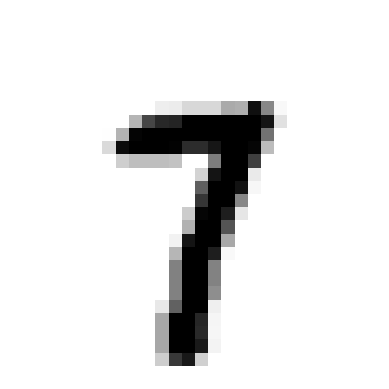

In [75]:
plt.imshow(sample_img, cmap= matplotlib.cm.binary, interpolation= "nearest")
plt.axis('off')

Label (what digit is this) ? 

In [76]:
y[48976] 

'7'

Splitting the Dataset

[The MNIST dataset is already split into train and test set with the first 60000 being the training set and the last 10000 being the testing set.]

In [77]:
x_train, x_test = X[:60000], X[60000:]

y_train, y_test = Y[:60000], Y[60000:]


Shuffling the data

In [78]:
shuffle = np.random.permutation(60000)

x_train, y_train = x_train[shuffle], y_train[shuffle]

#### Creating a '5' detector

In [79]:
# Changing Labels

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_5 = (y_train==5)
y_test_5 = (y_test==5)



Training a Binary Classifier

In [ ]:
classifier = LogisticRegression()

In [81]:
classifier.fit(x_train, y_train_5)

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Checking Predictions

In [82]:
classifier.predict([sample])

array([False])

Cross Validating

In [83]:
val_score = cross_val_score(classifier, x_train, y_train_5, cv=3, scoring= 'accuracy')

val_score

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

array([0.9737 , 0.97405, 0.97395])

In [84]:
val_score.mean()

0.9739

Creating a not '5' detector

In [85]:
# Changing the labels

y_train_not5 = (y_train!=5)
y_test_not5 = (y_test!=5)

Training a Binary Classifier

In [86]:
classifier_not5 = LogisticRegression()

In [87]:
classifier_not5.fit(x_train, y_train_not5)

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Checking Predictions

In [89]:
classifier_not5.predict([sample])

array([ True])

Cross Validating

In [92]:
val_score_not5 = cross_val_score(classifier_not5, x_train, y_train_not5, cv=3, scoring= 'accuracy')

val_score_not5

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

array([0.9737 , 0.9739 , 0.97395])

In [93]:
val_score_not5.mean()

0.97385

#### Checking the actual performance and eficiency of the model

In [95]:
y_train_pred = cross_val_predict(classifier, x_train, y_train_5, cv=3)

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [96]:
y_train_pred 

array([False, False, False, ..., False, False, False])

In [99]:
y_train_pred_not5 = cross_val_predict(classifier_not5, x_train, y_train_not5, cv=3)

y_train_pred_not5

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

array([ True,  True,  True, ...,  True,  True,  True])

Calculating Confusion Matrix

In [98]:
confusion_matrix(y_train_5, y_train_pred)

array([[54041,   538],
       [ 1028,  4393]], dtype=int64)

In [100]:
confusion_matrix(y_train_not5, y_train_pred_not5)

array([[ 4391,  1030],
       [  539, 54040]], dtype=int64)

In [101]:
confusion_matrix(y_train_5, y_train_5)    # Confusion matrix for perfect predictions

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Precision

In [103]:
precision_score(y_train_5, y_train_pred)

0.8908943419184749

In [107]:
precision_score(y_train_not5, y_train_pred_not5)

0.9812965316869439

Recall

In [104]:
recall_score(y_train_5, y_train_pred)

0.8103670909426305

In [108]:
recall_score(y_train_not5, y_train_pred_not5)


0.9901244068231371

F1 Score

In [114]:
f1_score(y_train_5, y_train_pred)

0.848724884080371

In [115]:
f1_score(y_train_not5, y_train_pred_not5)

0.9856907039735885

#### Precision Recall Curve

In [125]:
y_scores = cross_val_predict(classifier, x_train, y_train_5, cv=3, method= 'decision_function')

y_scores

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

array([ -8.63365907, -28.31739489,  -5.4729028 , ..., -12.71581093,
        -5.54695033, -14.2910869 ])

In [126]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [127]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [128]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [129]:
thresholds

array([-52.94368446, -52.60810674, -52.06714178, ...,  14.38020773,
        14.56863737,  17.25320605])

Plotting

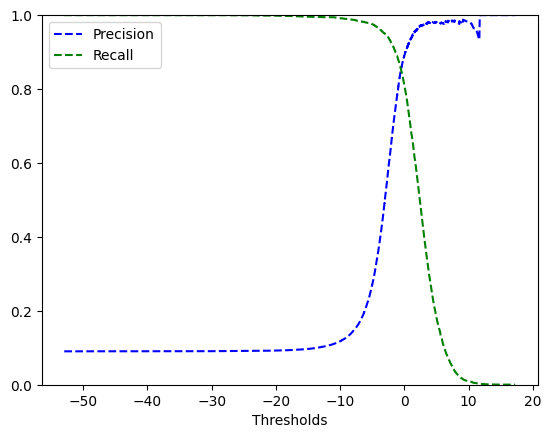

In [130]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

In [131]:
y_scores_not5 = cross_val_predict(classifier_not5, x_train, y_train_not5, cv=3, method= 'decision_function')

y_scores_not5

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

array([ 8.63366235, 28.31740135,  5.47290342, ..., 12.71581122,
        5.54694724, 14.29109018])

In [132]:
precisions_n5, recalls_n5, thresholds_n5 = precision_recall_curve(y_train_not5, y_scores_not5)

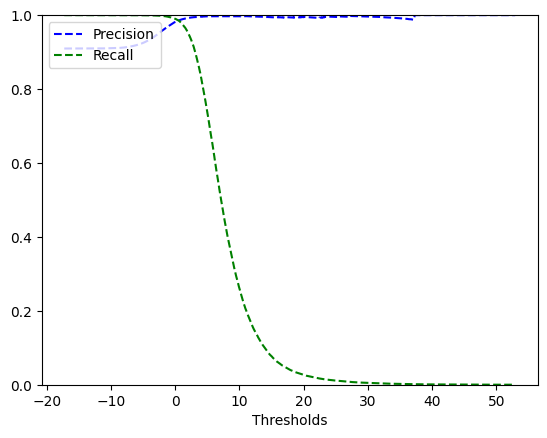

In [133]:
plt.plot(thresholds_n5, precisions_n5[:-1], "b--", label="Precision")
plt.plot(thresholds_n5, recalls_n5[:-1], "g--", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()